<a href="https://colab.research.google.com/github/andy9705/stock_project/blob/main/dtml_multimodal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive/jolproject/Adv-ALSTM

/content/drive/MyDrive/jolproject/Adv-ALSTM


In [ ]:
from datetime import datetime
import numpy as np
import os


data_path= "./data/kospi/ourpped/"



fnames = [fname for fname in os.listdir(data_path) if
              os.path.isfile(os.path.join(data_path, fname))]
print(len(fnames), ' tickers selected')
global total_stocks
total_stocks=len(fnames)
print(fnames)
import pandas as pd
data_path= "./data/kospi/ourpped/"
count=0
seq=10
#print(df_all)
for name in fnames:

  if count==0:

    df = pd.read_csv(data_path+name)
    print(df)
    count=1
  else:
    df2=pd.read_csv(data_path+name)
    print(df2)
    df=df.append(df2,ignore_index=True)
  
for i in range(len(df.columns)):
  index=df[df[df.columns[i]]==-123320].index
  df.drop(index , inplace=True)
total_num=len(df)
sep_num=total_num // len(fnames)
print(sep_num)
sep_tra_num=int(sep_num*0.8) 
sep_val_num=int(sep_num*0.1)
sep_test_num=int(sep_num-sep_tra_num-sep_val_num)


tra_num=sep_tra_num*len(fnames)-seq*len(fnames)
print(tra_num)
#input()
val_num=sep_val_num*len(fnames)
test_num=sep_test_num*len(fnames)
print(tra_num,val_num,test_num)

fea_dim=11
tra_pv = np.zeros([tra_num, seq, fea_dim], dtype=float)
print(len(tra_pv))
tra_title=[]
tra_gt = np.zeros([tra_num, 1], dtype=float)
ins_ind = 0
#input()
count=0
#print(df_all)
for name in fnames:
  df = pd.read_csv(data_path+name)
  for i in range(len(df.columns)):
    index=df[df[df.columns[i]]==-123320].index
    df.drop(index , inplace=True)
  temp=df.to_numpy()
  print(name)
  print(len(temp))
  for date_ind in range(sep_tra_num):
    if date_ind < seq:
      continue
    tra_pv[ins_ind]=temp[date_ind - seq: date_ind, : -2]
    tra_gt[ins_ind, 0] = temp[date_ind-1][-2]
    tra_title.append(temp[date_ind-1][-1])
    ins_ind +=1


val_pv = np.zeros([val_num, seq, fea_dim], dtype=float)
val_title=[]
val_gt = np.zeros([val_num, 1], dtype=float)
ins_ind = 0

for name in fnames:
  df = pd.read_csv(data_path+name)
  for i in range(len(df.columns)):
    index=df[df[df.columns[i]]==-123320].index
    df.drop(index , inplace=True)
  temp=df.to_numpy()
  #print(len(temp))
  for date_ind in range(sep_tra_num,sep_tra_num+sep_val_num):
    if date_ind < seq:
      continue
    val_pv[ins_ind]=temp[date_ind - seq: date_ind, : -2]
    val_gt[ins_ind, 0] = temp[date_ind-1][-2]
    val_title.append(temp[date_ind-1][-1])
    ins_ind +=1


tes_pv = np.zeros([test_num, seq, fea_dim], dtype=float)
tes_title=[]
tes_gt = np.zeros([test_num, 1], dtype=float)
ins_ind = 0

for name in fnames:
  df = pd.read_csv(data_path+name)
  for i in range(len(df.columns)):
    index=df[df[df.columns[i]]==-123320].index
    df.drop(index , inplace=True)
  temp=df.to_numpy()
  #print(len(temp))
  for date_ind in range(sep_tra_num+sep_val_num,sep_tra_num+sep_val_num+sep_test_num):
    if date_ind < seq:
      continue
    #print(date_ind)
    tes_pv[ins_ind]=temp[date_ind - seq: date_ind, : -2]
    tes_gt[ins_ind, 0] = temp[date_ind-1][-2]
    tes_title.append(temp[date_ind-1][-1])
    ins_ind +=1



51  tickers selected
['hanhwasolution.csv', 'samsungjungi.csv', 'lginotec.csv', 'skhynics.csv', 'haesungds.csv', 'hangookgumyoung.csv', 'kiwoom.csv', 'lgchemistry.csv', 'kakao.csv', 'naver.csv', 'samyang.csv', 'nongshim.csv', 'kbbank.csv', 'hyundaimobis.csv', 'mando.csv', 'samsungsdi.csv', 'lgdisplay.csv', 'younid.csv', 'nexentire.csv', 'koreajosunhaeyang.csv', 'hyundaimipojosun.csv', 'hansoljaeji.csv', 'samsungcard.csv', 'oci.csv', 'celltrion.csv', 'samsungbiologics.csv', 'skinovation.csv', 'hansum.csv', 'hyundaibaekhwajum.csv', 'shinsaegae.csv', 'hotelshinla.csv', 'mcnex.csv', 'kia.csv', 'hyundaigunsul.csv', 'hanhwaaerospace.csv', 'gsgunsul.csv', 'samsungengineering.csv', 'namhaechemistry.csv', 'merichjungun.csv', 'merichgumyoungjiju.csv', 'miraeasset.csv', 'hmm.csv', 'cswind.csv', 'samsunglife.csv', 'samsungsds.csv', 'skt.csv', 'lguplus.csv', 'netmable.csv', 'ncsoft.csv', 'cjjailjaedang.csv', 'lotteshoping.csv']
        zopen     zhigh      zlow         zclose      zadjclose        

In [ ]:
import pandas as pd
data_path= "./data/kospi/globalmarket/"

fnames = [fname for fname in os.listdir(data_path) if
              os.path.isfile(os.path.join(data_path, fname))]
print(len(fnames), ' tickers selected')
print(fnames)
count=0
seq=10
#print(df_all)
for name in fnames:

  if count==0:

    df = pd.read_csv(data_path+name)
    print(df)
    count=1
  else:
    df2=pd.read_csv(data_path+name)
    print(df2)
    df=df.append(df2,ignore_index=True)
df = df.iloc[:-1 , :]
for i in range(len(df.columns)):
  index=df[df[df.columns[i]]==-123320].index
  df.drop(index , inplace=True)
total_num=len(df)
sep_num=total_num // len(fnames)
print(sep_num)
sep_tra_num=int(sep_num*0.8) 
sep_val_num=int(sep_num*0.1)
sep_test_num=int(sep_num-sep_tra_num-sep_val_num)


tra_num=sep_tra_num*len(fnames)-seq*len(fnames)
val_num=sep_val_num*len(fnames)
test_num=sep_test_num*len(fnames)
print(tra_num,val_num,test_num)

fea_dim=11
global_tra_pv = np.zeros([tra_num, seq, fea_dim], dtype=float)

#tra_gt = np.zeros([tra_num, 1], dtype=float)
ins_ind = 0
#input()
count=0
#print(df_all)
for name in fnames:
  df = pd.read_csv(data_path+name)
  for i in range(len(df.columns)):
    index=df[df[df.columns[i]]==-123320].index
    df.drop(index , inplace=True)
  temp=df.to_numpy()
  print(len(temp))
  for date_ind in range(sep_tra_num):
    if date_ind < seq:
      continue
    global_tra_pv[ins_ind]=temp[date_ind - seq: date_ind, : ]
    #tra_gt[ins_ind, 0] = temp[date_ind-1][-2]
    #tra_title.append(temp[date_ind-1][-1])
    ins_ind +=1


global_val_pv = np.zeros([val_num, seq, fea_dim], dtype=float)
# val_title=[]
# val_gt = np.zeros([val_num, 1], dtype=float)
ins_ind = 0

for name in fnames:
  df = pd.read_csv(data_path+name)
  for i in range(len(df.columns)):
    index=df[df[df.columns[i]]==-123320].index
    df.drop(index , inplace=True)
  temp=df.to_numpy()
  #print(len(temp))
  for date_ind in range(sep_tra_num,sep_tra_num+sep_val_num):
    if date_ind < seq:
      continue
    global_val_pv[ins_ind]=temp[date_ind - seq: date_ind, : ]
    # val_gt[ins_ind, 0] = temp[date_ind-1][-2]
    # val_title.append(temp[date_ind-1][-1])
    ins_ind +=1


global_tes_pv = np.zeros([test_num, seq, fea_dim], dtype=float)
#tes_title=[]
#tes_gt = np.zeros([test_num, 1], dtype=float)
ins_ind = 0

for name in fnames:
  df = pd.read_csv(data_path+name)
  for i in range(len(df.columns)):
    index=df[df[df.columns[i]]==-123320].index
    df.drop(index , inplace=True)
  temp=df.to_numpy()
  #print(len(temp))
  for date_ind in range(sep_tra_num+sep_val_num,sep_tra_num+sep_val_num+sep_test_num):
    if date_ind < seq:
      continue
    #print(date_ind)
    global_tes_pv[ins_ind]=temp[date_ind - seq: date_ind, : ]
    # tes_gt[ins_ind, 0] = temp[date_ind-1][-2]
    # tes_title.append(temp[date_ind-1][-1])
    ins_ind +=1

globaltra_pv=global_tra_pv
globaltes_pv=global_tes_pv
globalval_pv=global_val_pv

print(globaltra_pv)
print(globalval_pv)
print(globaltes_pv)

print(len(globaltra_pv))
print(len(globalval_pv))
print(len(globaltes_pv))

1  tickers selected
['kospi.csv']
        zopen     zhigh      zlow         zclose      zadjclose  \
0    0.020174  0.021617 -0.002851 -123320.000000 -123320.000000   
1    0.009084  0.010543 -0.001028      -0.008109      -0.008109   
2   -0.008879  0.000652 -0.012794       0.008301       0.008301   
3   -0.001404  0.005380 -0.003044       0.013357       0.013357   
4    0.006621  0.008606 -0.000830      -0.005807      -0.005807   
..        ...       ...       ...            ...            ...   
900  0.003269  0.006743 -0.001725       0.001522       0.001522   
901  0.002130  0.002472 -0.004071      -0.021822      -0.021822   
902 -0.003966  0.001216 -0.007120       0.009906       0.009906   
903 -0.015607  0.000688 -0.018572       0.008617       0.008617   
904  0.011339  0.011591  0.000000      -0.022831      -0.022831   

                z5            z10            z15            z20  \
0   -123320.000000 -123320.000000 -123320.000000 -123320.000000   
1   -123320.000000 -123320.

In [ ]:
tra_pv=tra_pv*100
tes_pv=tes_pv*100
val_pv=val_pv*100
globaltra_pv=globaltra_pv*100
globalval_pv=globalval_pv*100
globaltes_pv=globaltes_pv*100


In [ ]:
import numpy as np
import random
import pandas as pd 
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

from pandas import datetime
import math, time
import itertools
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
import torch
import torch.nn as nn
from torch.autograd import Variable
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

x_train = torch.from_numpy(tra_pv).type(torch.Tensor).to(device)
x_test = torch.from_numpy(tes_pv).type(torch.Tensor).to(device)
y_train = torch.from_numpy(tra_gt).type(torch.Tensor).to(device)
y_test = torch.from_numpy(tes_gt).type(torch.Tensor).to(device)
x_val = torch.from_numpy(val_pv).type(torch.Tensor).to(device)
y_val = torch.from_numpy(val_gt).type(torch.Tensor).to(device)

global_train = torch.from_numpy(globaltra_pv).type(torch.Tensor).to(device)
global_val = torch.from_numpy(globalval_pv).type(torch.Tensor).to(device)
global_test = torch.from_numpy(globaltes_pv).type(torch.Tensor).to(device)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':


cuda


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 4.1 MB/s 
     |████████████████████████████████| 120 kB 53.8 MB/s 
     |████████████████████████████████| 6.6 MB 37.2 MB/s 


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("snunlp/KR-FinBert-SC")

model = AutoModelForSequenceClassification.from_pretrained("snunlp/KR-FinBert-SC")

temp=tra_title
print(temp)
result=[]
for i in temp:
  inputs = tokenizer(i, return_tensors="pt")
  #print(inputs)
  with torch.no_grad():
      outputs = model(**inputs)
      pred=torch.argmax(outputs.logits).cpu().detach().item()
  #print(logits)
  #print(logits.shape)
  result.append([pred])
#print(result)
result=torch.tensor(result)
print(result.shape)
print(result)

tra_finbert=result



temp=val_title
result=[]
for i in temp:
  inputs = tokenizer(i, return_tensors="pt")
  #print(inputs)
  with torch.no_grad():
      outputs = model(**inputs)
      pred=torch.argmax(outputs.logits).cpu().detach().item()
  #print(logits)
  #print(logits.shape)
  result.append([pred])
#print(result)
result=torch.tensor(result)
print(result.shape)
print(result)

val_finbert=result

temp=tes_title
result=[]
for i in temp:
  inputs = tokenizer(i, return_tensors="pt")
  #print(inputs)
  with torch.no_grad():
      outputs = model(**inputs)
      pred=torch.argmax(outputs.logits).cpu().detach().item()
  #print(logits)
  #print(logits.shape)
  result.append([pred])
#print(result)
result=torch.tensor(result)
print(result.shape)
print(result)

tes_finbert=result


['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [ ]:
torch.save(tra_finbert, 'tra_finbert.pt')
torch.save(tes_finbert, 'tes_finbert.pt')
torch.save(val_finbert, 'val_finbert.pt')

In [ ]:
tra_finbert.shape,tes_finbert.shape,val_finbert.shape

(torch.Size([35190, 1]), torch.Size([4488, 1]), torch.Size([4437, 1]))

In [ ]:
tra_finbert

tensor([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], device='cuda:0')

In [ ]:
tra_finbert=torch.load('tra_finbert.pt')
val_finbert=torch.load('val_finbert.pt')
tes_finbert=torch.load('tes_finbert.pt')

In [ ]:
tra_finbert=torch.load('tra_finbert.pt').to(device)
val_finbert=torch.load('val_finbert.pt').to(device)
tes_finbert=torch.load('tes_finbert.pt').to(device)



In [ ]:
for i in range(len(tra_finbert)):
  if tra_finbert[i]==0:
    tra_finbert[i]=-1

for i in range(len(tra_finbert)):
  if tra_finbert[i]==1:
    tra_finbert[i]=0

for i in range(len(tra_finbert)):
  if tra_finbert[i]==2:
    tra_finbert[i]=1

for i in range(len(val_finbert)):
  if val_finbert[i]==0:
    val_finbert[i]=-1

for i in range(len(val_finbert)):
  if val_finbert[i]==1:
    val_finbert[i]=0

for i in range(len(val_finbert)):
  if val_finbert[i]==2:
    val_finbert[i]=1

for i in range(len(tes_finbert)):
  if tes_finbert[i]==0:
    tes_finbert[i]=-1

for i in range(len(tes_finbert)):
  if tes_finbert[i]==1:
    tes_finbert[i]=0

for i in range(len(tes_finbert)):
  if tes_finbert[i]==2:
    tes_finbert[i]=1    

In [ ]:
print(tra_finbert)
print(val_finbert)
print(tes_finbert)

tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], device='cuda:0')
tensor([[ 1],
        [ 0],
        [-1],
        ...,
        [ 0],
        [ 0],
        [ 0]], device='cuda:0')
tensor([[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]], device='cuda:0')


In [ ]:
from torch.utils.data import Dataset
class CustomDataset(Dataset):
    def __init__(self, x_train, y_train, global_train,finbert):
        self.x_train = x_train
        self.y_train = y_train
        self.title=finbert

        self.global_train = global_train

        print(len(self.x_train))
        print(len(self.y_train))
        print(len(self.title))
        print(len(self.global_train))
        numbers=len(self.x_train)//total_stocks
        print(total_stocks)
        self.temp3=[]
        for i in range(len(self.global_train)):#요일 별로
          temp=[]
          for j in range(total_stocks):
            temp2=[self.x_train[i+numbers*j],self.y_train[i+numbers*j],self.global_train[i],self.title[i+numbers*j]]
            
            temp.append(temp2)
          self.temp3.append(temp)
        

    def __len__(self):
        return len(self.x_train)//total_stocks

    def __getitem__(self, idx):
        x=[]
        y=[]
        global_value=[]
        tt=[]
        for i in range(total_stocks):
          x.append(self.temp3[idx][i][0])
          y.append(self.temp3[idx][i][1])
          tt.append(self.temp3[idx][i][3])
          global_value.append(self.temp3[idx][i][2])
        x=torch.stack(x,0)
        y=torch.stack(y,0)
        tt=torch.stack(tt,0)
        global_value=torch.stack(global_value,0)

        return x,y,global_value,tt

In [ ]:
from torch.utils.data import DataLoader

temp_train=CustomDataset(x_train,y_train,global_train,tra_finbert)
temp_test=CustomDataset(x_test,y_test,global_test,tes_finbert)
temp_val=CustomDataset(x_val,y_val,global_val,val_finbert)


train_dataloader = DataLoader(temp_train, batch_size=512, shuffle=True, num_workers=0)
test_dataloader = DataLoader(temp_test, batch_size=512, shuffle=True, num_workers=0)
val_dataloader=DataLoader(temp_val, batch_size=512, shuffle=False, num_workers=0)

35190
35190
35190
690
51
4488
4488
4488
88
51
4437
4437
4437
87
51


In [ ]:
def get_accuracy(y_true, y_prob):
    
    y_prob = y_prob > 0.0
    
    return (y_true == y_prob).sum().item() / y_true.size(0)

In [ ]:
def get_top_k_accuracy(y_true, y_prob,k):
    
    aaa=y_prob.view([-1,51])
    answersheet=y_true.view([-1,51])
    
    
    value,indice=torch.topk(aaa,k)
    
    
    correct=0
    problems=0
    for i in range(len(indice)):
      
      
      for j in range(k):
        if answersheet[i][indice[i][j].item()]==1 and value[i][j].item()>0:
          correct=correct+1

        elif answersheet[i][indice[i][j].item()]==0 and value[i][j].item()<0:
          correct=correct+1
        else:
          pass 
        problems=problems+1
      
    
    
    
    return correct/problems

In [ ]:
# Build model
#####################
input_dim = 11
hidden_dim = 64
num_layers = 1 
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()

        #feature transformerlayer
        self.feature_transformer=nn.Linear(input_dim,hidden_dim)
        self.tanh_layer=nn.Tanh()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)
        

    def forward(self, x):
        # Initialize hidden state with zeros
        #print(x)
        #print(x.shape)
        x=self.feature_transformer(x)
        #print(x)
        #print(x.shape)
        x=self.tanh_layer(x)
        #print(x)
        #print(x.shape)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        #print(x)
        #print(x.shape)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        #print(out.shape)  #98750, 10 ,32
        #input()
        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states!
        #print(out[:, -1, :])
        #print(out[:, -1, :].shape) #98750, 32
        #input() 
        out = self.fc(out[:, -1, :])
        
        #print(out)
        #print(out.shape)
        #input() 
        # out.size() --> 100, 10
        return out
    


LSTM(
  (feature_transformer): Linear(in_features=11, out_features=64, bias=True)
  (tanh_layer): Tanh()
  (lstm): LSTM(64, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
8
torch.Size([64, 11])
torch.Size([64])
torch.Size([256, 64])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([1, 64])
torch.Size([1])
Epoch    0/300 Batch 0/2 Cost: 0.698637
Epoch    0/300 Batch 1/2 Cost: 0.694193
0 0.43272481406355645 0 0.499777183600713
Epoch    1/300 Batch 0/2 Cost: 0.696319
Epoch    1/300 Batch 1/2 Cost: 0.698517
0 0.43903538426864996 1 0.4968805704099822
Epoch    2/300 Batch 0/2 Cost: 0.696763
Epoch    2/300 Batch 1/2 Cost: 0.695433
0 0.4439936894297949 2 0.49866310160427807
Epoch    3/300 Batch 0/2 Cost: 0.696512
Epoch    3/300 Batch 1/2 Cost: 0.694405
0 0.4482758620689655 3 0.4988859180035651
Epoch    4/300 Batch 0/2 Cost: 0.695691
Epoch    4/300 Batch 1/2 Cost: 0.695004
0 0.4527834122154609 4 0.5020053475935828
Epoch    5/300 Batch 0/2 C

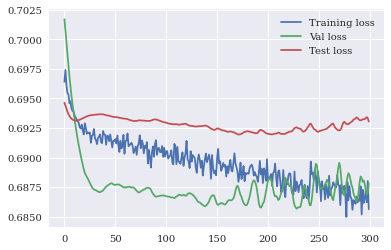

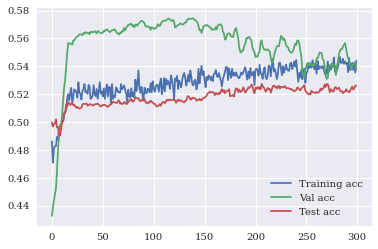

288 0.5218360071301248
최종 acc
0.5262923351158645


In [ ]:
###Dataloader 연습

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)

loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.0001)
#optimiser = torch.optim.SGD(model.parameters(), lr=0.00001,momentum=0.9)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
    
num_epochs = 300

hist1 = np.zeros(num_epochs)
hist0=  np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
hist3 = np.zeros(num_epochs)
hist4 = np.zeros(num_epochs)
hist5 = np.zeros(num_epochs)
seq=10
# Number of steps to unroll
seq_dim =seq-1  

patience=5
check_early_stopping=0
val_accuracy=0
test_accuracy=0
count=0

myepoch=0
mytestacc=0
lastvalacc=0
finishpoint=0
for t in range(num_epochs):
    model.train()
    trainacc=0
    trainloss=0
    for batch_idx, batch in enumerate(train_dataloader):
      
      x,y,global_value,tt=batch  
      # Initialise hidden state
      # Don't do this if you want your LSTM to be stateful
      #model.hidden = model.init_hidden()
      
      # print(x)
      # print(len(x))
      # print(y)
      # print(global_value)
      # print(x.shape)
      # print(y.shape)
      # print(global_value.shape)
      # torch.Size([64, 85, 10, 11])
      # torch.Size([64, 85, 1])
      # torch.Size([64, 85, 10, 11])
      x=x.view([-1,10,11])
      y=y.view([-1,1])
      global_value=global_value.view([-1,10,11])
      
      y_train_pred = model(x)
    
      # print(y_train_pred)
      # print(y_train_pred.shape)
      # print(y_train)
      # print(y_train.shape)
    
      loss = loss_fn(y_train_pred, y)
      optimiser.zero_grad()

      # Backward pass
      loss.backward()
      trainloss=trainloss+loss
      # Update parameters
      optimiser.step()
      print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        t, num_epochs, batch_idx, len(train_dataloader),
        loss.item()
        ))
      trainacc=trainacc+get_accuracy(y,y_train_pred)
    hist0[t] = trainloss/len(train_dataloader)
    hist2[t]=trainacc/len(train_dataloader)
    #print("Epoch: ",t)
    #print("training acc: {}, training loss: {}".format(get_accuracy(y_train,y_train_pred),loss))
    #hist2[t]=get_accuracy(y_train,y_train_pred)
    # Zero out gradient, else they will accumulate between epochs
    

    model.eval()
    correct=0
    with torch.no_grad():
        valacc=0
        valloss=0
        
        for batch_idx, batch in enumerate(val_dataloader):
          x_val,y_val,global_value_val,tt=batch 
          x_val=x_val.view([-1,10,11])
          y_val=y_val.view([-1,1])
          global_value_val=global_value_val.view([-1,10,11])
          y_val_pred = model(x_val)
          valacc=valacc+get_accuracy(y_val,y_val_pred)
          valloss=valloss+loss_fn(y_val_pred, y_val)
        
        #   #val_acc=get_accuracy(y_val,y_val_pred)
        #   val_loss = loss_fn(y_val_pred, y_val)
        #  #hist1[t] = val_loss.item()
        #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
        #   test_acc=get_accuracy(y_test,y_test_pred)
        #   hist3[t]=val_acc
        #   hist4[t]=test_acc
        #   #print(y_val_pred)
        #   #print(get_accuracy(y_val,y_val_pred))
        #   if val_accuracy <val_acc:
        #     val_accuracy=val_acc
        #     test_accuracy=test_acc
        #     check_early_stopping=0
        #     checkepoch=t
        #   else:
        #     check_early_stopping=check_early_stopping+1
        hist1[t] = valloss/len(val_dataloader)
        hist3[t]=valacc/len(val_dataloader)



        testacc=0
        testloss=0
        for batch_idx, batch in enumerate(test_dataloader):
          x_test,y_test,global_value_test,tt=batch 
          x_test=x_test.view([-1,10,11])
          y_test=y_test.view([-1,1])
          global_value_test=global_value_test.view([-1,10,11])
          y_test_pred = model(x_test)
          testacc=testacc+get_accuracy(y_test,y_test_pred)
          testloss=testloss+loss_fn(y_test_pred, y_test)
        hist4[t]=testacc/len(test_dataloader)
        hist5[t]=testloss/len(test_dataloader)
    print(lastvalacc,hist3[t],t,hist4[t])
    if lastvalacc<hist3[t] and t>250:
      if finishpoint==0:
        count=0

        lastvalacc=hist3[t]
        torch.save(model, 'model_lstm.pt')
        print(t,hist4[t])
        myepoch=t
        mytestacc=hist4[t]  
    elif t>250 and lastvalacc>=hist3[t]:
      count=count+1
      if count==100:
        print(myepoch,mytestacc)
        finishpoint=1

        #   #val_acc=get_accuracy(y_val,y_val_pred)
        #   val_loss = loss_fn(y_val_pred, y_val)
        #  #hist1[t] = val_loss.item()
        #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
        #   test_acc=get_accuracy(y_test,y_test_pred)
        #   hist3[t]=val_acc
        #   hist4[t]=test_acc
        #   #print(y_val_pred)
        #   #print(get_accuracy(y_val,y_val_pred))
        #   if val_accuracy <val_acc:
        #     val_accuracy=val_acc
        #     test_accuracy=test_acc
        #     check_early_stopping=0
        #     checkepoch=t
        #   else:
        #     check_early_stopping=check_early_stopping+1
        #hist1[t] = val_loss.item()
        
      # print("val acc: {}, test acc: {}".format(val_acc,test_acc))
      # if check_early_stopping==patience:
      #   print("early stopping!")
      #   print(val_accuracy)
      #   print("epochs: ",t)
#test score
# model.eval()
# with torch.no_grad():
#     y_test_pred=model(x_test)
#     print(get_accuracy(y_test,y_test_pred))

plt.plot(hist0, label="Training loss")
plt.plot(hist1, label="Val loss")
plt.plot(hist5, label="Test loss")
plt.legend()
plt.show()
plt.plot(hist2, label="Training acc")
plt.plot(hist3, label="Val acc")
plt.plot(hist4, label="Test acc")
plt.legend()
plt.show()

print(myepoch,mytestacc)
print("최종 acc")
print(testacc)

In [ ]:



# Here we define our model as a class
class ALSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(ALSTM, self).__init__()
        self.softmax_layer=nn.Softmax(dim=1)
        #feature transformerlayer
        self.feature_transformer=nn.Linear(input_dim,hidden_dim)
        self.tanh_layer=nn.Tanh()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

        # self.fc1=nn.Linear(16,4)
        # self.fc2=nn.Linear(4,1)

    def forward(self, x):
        # Initialize hidden state with zeros
        #print(x)
        #print(x.shape)
        x=self.feature_transformer(x)
        #print(x)
        #print(x.shape)
        x=self.tanh_layer(x)
        #print(x)
        #print(x.shape)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(device)

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        #print(x)
        #print(x.shape)
        out, (hn, cn) = self.lstm(x, (h0, c0))
        sumscore=0
        scorelist=[]
        #print(out[:,-1,:].shape)#torch.Size([98750, 32]) 마지막 ht
        #print(out[:,:,:].shape) #torch.Size([98750, 10, 32]) h1~ht
        
        base=out[:,-1,:].view(-1,1,self.hidden_dim) #ht
        #print(base.shape)
        #print(base[0][0])
        #print(base.transpose(1,2)[0])
        #print(base.transpose(1,2).shape)
        
        base=base.transpose(1,2)
        score=torch.bmm(out,base) #h1~ht 내적 ht -> score 값들
        #print(out[0])
        #print(out.shape)
        #print(score.shape) #torch.Size([98750, 10, 1])
        #print(score[0])
        score = self.softmax_layer(score) #softmax score까지함 
        #print(score[0])
        #print(score[0].sum())
        
        #print(score.shape) #torch.Size([98750, 10, 1])
        transpose_out=out[:,:,:].transpose(1,2) #torch.Size([98750, 32, 10])
        #print(transpose_out.shape)
        new_out=torch.bmm(transpose_out,score)
        #print(new_out.shape) #torch.Size([33830, 64, 1])
        #input()
        new_out=new_out.view(-1,self.hidden_dim)
        #print(new_out.shape)
        #input()
        # for i in range(seq):
        #   print(out[:,i,:].shape)
        #   print(base.shape)
        #   score=torch.bmm(out[:,i,:],base)
        #   print(score.shape)
        #   scorelist.append(score)
        #   sumscore=sumscore+score
        # print(scorelist)
        # print(sumscore)
        # input()
        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states!
        #print(out[:, -1, :])
        #print(out[:, -1, :].shape) 
        out = self.fc(new_out)
        # out = self.fc1(out)
        # out = self.fc2(out)
        #input() 
        # out.size() --> 100, 10
        return out
    


ALSTM(
  (softmax_layer): Softmax(dim=1)
  (feature_transformer): Linear(in_features=11, out_features=64, bias=True)
  (tanh_layer): Tanh()
  (lstm): LSTM(64, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)
8
torch.Size([64, 11])
torch.Size([64])
torch.Size([256, 64])
torch.Size([256, 64])
torch.Size([256])
torch.Size([256])
torch.Size([1, 64])
torch.Size([1])
Epoch    0/300 Batch 0/2 Cost: 0.693106
Epoch    0/300 Batch 1/2 Cost: 0.692414
0 0.5066486364660807 0 0.4770499108734403
Epoch    1/300 Batch 0/2 Cost: 0.692803
Epoch    1/300 Batch 1/2 Cost: 0.692548
0 0.5111561866125761 1 0.4763814616755793
Epoch    2/300 Batch 0/2 Cost: 0.692826
Epoch    2/300 Batch 1/2 Cost: 0.691973
0 0.524904214559387 2 0.4803921568627451
Epoch    3/300 Batch 0/2 Cost: 0.692084
Epoch    3/300 Batch 1/2 Cost: 0.693719
0 0.5334685598377282 3 0.481951871657754
Epoch    4/300 Batch 0/2 Cost: 0.692360
Epoch    4/300 Batch 1/2 Cost: 0.692467
0 0.5445120576966419 4 0.485071301247

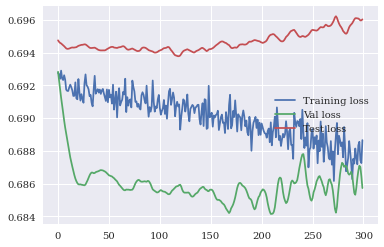

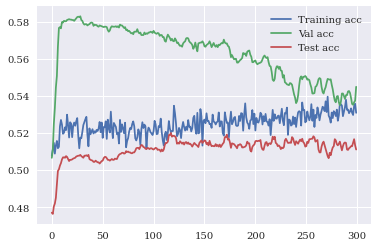

263 0.5095811051693404
최종 acc
0.5111408199643493


In [ ]:
###Dataloader 연습

model = ALSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers).to(device)

loss_fn = torch.nn.BCEWithLogitsLoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.0001)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
    
num_epochs = 300

hist1 = np.zeros(num_epochs)
hist0=  np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
hist3 = np.zeros(num_epochs)
hist4 = np.zeros(num_epochs)
hist5 = np.zeros(num_epochs)
seq=10
# Number of steps to unroll
seq_dim =seq-1  

patience=5
check_early_stopping=0
val_accuracy=0
test_accuracy=0
count=0

myepoch=0
mytestacc=0
lastvalacc=0
finishpoint=0
for t in range(num_epochs):
    model.train()
    trainacc=0
    trainloss=0
    for batch_idx, batch in enumerate(train_dataloader):
      
      x,y,global_value,tt=batch  
      # Initialise hidden state
      # Don't do this if you want your LSTM to be stateful
      #model.hidden = model.init_hidden()
      
      # print(x)
      # print(len(x))
      # print(y)
      # print(global_value)
      # print(x.shape)
      # print(y.shape)
      # print(global_value.shape)
      # torch.Size([64, 85, 10, 11])
      # torch.Size([64, 85, 1])
      # torch.Size([64, 85, 10, 11])
      x=x.view([-1,10,11])
      y=y.view([-1,1])
      global_value=global_value.view([-1,10,11])
      
      y_train_pred = model(x)
    
      # print(y_train_pred)
      # print(y_train_pred.shape)
      # print(y_train)
      # print(y_train.shape)
    
      loss = loss_fn(y_train_pred, y)
      optimiser.zero_grad()

      # Backward pass
      loss.backward()
      trainloss=trainloss+loss
      # Update parameters
      optimiser.step()
      print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        t, num_epochs, batch_idx, len(train_dataloader),
        loss.item()
        ))
      trainacc=trainacc+get_accuracy(y,y_train_pred)
    hist0[t] = trainloss/len(train_dataloader)
    hist2[t]=trainacc/len(train_dataloader)
    #print("Epoch: ",t)
    #print("training acc: {}, training loss: {}".format(get_accuracy(y_train,y_train_pred),loss))
    #hist2[t]=get_accuracy(y_train,y_train_pred)
    # Zero out gradient, else they will accumulate between epochs
    

    model.eval()
    correct=0
    with torch.no_grad():
        valacc=0
        valloss=0
        
        for batch_idx, batch in enumerate(val_dataloader):
          x_val,y_val,global_value_val,tt=batch 
          x_val=x_val.view([-1,10,11])
          y_val=y_val.view([-1,1])
          global_value_val=global_value_val.view([-1,10,11])
          y_val_pred = model(x_val)
          valacc=valacc+get_accuracy(y_val,y_val_pred)
          valloss=valloss+loss_fn(y_val_pred, y_val)
        
        #   #val_acc=get_accuracy(y_val,y_val_pred)
        #   val_loss = loss_fn(y_val_pred, y_val)
        #  #hist1[t] = val_loss.item()
        #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
        #   test_acc=get_accuracy(y_test,y_test_pred)
        #   hist3[t]=val_acc
        #   hist4[t]=test_acc
        #   #print(y_val_pred)
        #   #print(get_accuracy(y_val,y_val_pred))
        #   if val_accuracy <val_acc:
        #     val_accuracy=val_acc
        #     test_accuracy=test_acc
        #     check_early_stopping=0
        #     checkepoch=t
        #   else:
        #     check_early_stopping=check_early_stopping+1
        hist1[t] = valloss/len(val_dataloader)
        hist3[t]=valacc/len(val_dataloader)



        testacc=0
        testloss=0
        for batch_idx, batch in enumerate(test_dataloader):
          x_test,y_test,global_value_test,tt=batch 
          x_test=x_test.view([-1,10,11])
          y_test=y_test.view([-1,1])
          global_value_test=global_value_test.view([-1,10,11])
          y_test_pred = model(x_test)
          testacc=testacc+get_accuracy(y_test,y_test_pred)
          testloss=testloss+loss_fn(y_test_pred, y_test)
        hist4[t]=testacc/len(test_dataloader)
        hist5[t]=testloss/len(test_dataloader)
    print(lastvalacc,hist3[t],t,hist4[t])
    if lastvalacc<hist3[t] and t>250:
      if finishpoint==0:
        count=0

        lastvalacc=hist3[t]
        torch.save(model, 'model_alstm.pt')
        print(t,hist4[t])
        myepoch=t
        mytestacc=hist4[t]  
    elif t>250 and lastvalacc>=hist3[t]:
      count=count+1
      if count==100:
        print(myepoch,mytestacc)
        finishpoint=1

        #   #val_acc=get_accuracy(y_val,y_val_pred)
        #   val_loss = loss_fn(y_val_pred, y_val)
        #  #hist1[t] = val_loss.item()
        #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
        #   test_acc=get_accuracy(y_test,y_test_pred)
        #   hist3[t]=val_acc
        #   hist4[t]=test_acc
        #   #print(y_val_pred)
        #   #print(get_accuracy(y_val,y_val_pred))
        #   if val_accuracy <val_acc:
        #     val_accuracy=val_acc
        #     test_accuracy=test_acc
        #     check_early_stopping=0
        #     checkepoch=t
        #   else:
        #     check_early_stopping=check_early_stopping+1
        #hist1[t] = val_loss.item()
        
      # print("val acc: {}, test acc: {}".format(val_acc,test_acc))
      # if check_early_stopping==patience:
      #   print("early stopping!")
      #   print(val_accuracy)
      #   print("epochs: ",t)
#test score
# model.eval()
# with torch.no_grad():
#     y_test_pred=model(x_test)
#     print(get_accuracy(y_test,y_test_pred))

plt.plot(hist0, label="Training loss")
plt.plot(hist1, label="Val loss")
plt.plot(hist5, label="Test loss")
plt.legend()
plt.show()
plt.plot(hist2, label="Training acc")
plt.plot(hist3, label="Val acc")
plt.plot(hist4, label="Test acc")
plt.legend()
plt.show()

print(myepoch,mytestacc)
print("최종 acc")
print(testacc/len(test_dataloader))

In [ ]:
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()

        
        
        
        
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout,device 
                                                  ) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        
        
    def forward(self, src):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len = src.shape[1]
        
        
        
        for layer in self.layers:
            src = layer(src)
            
        #src = [batch size, src len, hid dim]
            
        return src

class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout,device 
                 ):
        super().__init__()
        
        self.layer_norm1 = nn.LayerNorm(hid_dim)
        self.layer_norm2 = nn.LayerNorm(hid_dim)
        
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout,device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        self.MLP1=nn.Linear(hid_dim,pf_dim)
        self.MLP2=nn.Linear(pf_dim,hid_dim)
        self.tanh_layer=nn.Tanh()
    def forward(self, src):
        
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len] 
                
        #self attention
        _src, _ = self.self_attention(src, src, src) #_src H물결  src H
        add_norm=self.layer_norm1(_src+src)
        #dropout, residual connection and layer norm
        t=self.MLP1(add_norm)
        t = torch.nn.functional.relu(t)
        t=self.dropout(t)
        t=self.MLP2(t)
        t=torch.nn.functional.relu(t)
        t=self.dropout(t)
        
        
        #src = [batch size, src len, hid dim]
        
        #positionwise feedforward
        src = self.tanh_layer(t+add_norm) #
        src=self.dropout(src)
        #dropout, residual and layer norm
        src = self.layer_norm2(src)
        
        #src = [batch size, src len, hid dim]
        
        return src

class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout,device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        #self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
        
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]
                
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        
        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        #energy = [batch size, n heads, query len, key len]
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        attention = torch.softmax(energy, dim = -1)
                
        #attention = [batch size, n heads, query len, key len]
                
        x = torch.matmul(self.dropout(attention), V)
        
        #x = [batch size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        #x = [batch size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        #x = [batch size, query len, hid dim]
        
        x = self.fc_o(x)
        
        #x = [batch size, query len, hid dim]
        
        return x, attention

class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [batch size, seq len, hid dim]
        
        new_x = self.dropout(torch.relu(self.fc_1(x)))
        
        #x = [batch size, seq len, pf dim]
        
        new_x = self.fc_2(new_x)
        
        #x = [batch size, seq len, hid dim]
        
        return x

# Build model
#####################

#the window size𝑤 in {10, 15}, the market context weight
# 𝛽 in {0.01, 0.1, 1}, the hidden layer size ℎ in {64, 128}, the number
# of epochs in {100, 200}, and the learning rate in {0.001, 0.0001}. We
# set the strength 𝜆 of selective regularization to 1 and the dropout
# rate to 0.15. We use the Adam optimizer [14] for the training with
# the early stopping by the validation accuracy. For competitors, we
# use the default settings in their public implementations.






# Here we define our model as a class
class DTML(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,encoder):
        super(DTML, self).__init__()
        self.softmax_layer=nn.Softmax(dim=1)
        #feature transformerlayer
        self.feature_transformer=nn.Linear(input_dim,hidden_dim)
        self.tanh_layer=nn.Tanh()
        #self.global_train=global_train

        self.global_feature_transformer=nn.Linear(input_dim,hidden_dim)
        self.global_tanh_layer=nn.Tanh()

        self.layer_nomalization= nn.LayerNorm(hidden_dim)
        self.layer_nomalization2= nn.LayerNorm(hidden_dim)
        self.layer_nomalization3= nn.LayerNorm(hidden_dim)
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.stocklstm = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)
        self.globallstm = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)


        #transformer
        self.encoder=encoder
        # Readout layer
        self.fc1 = nn.Linear(hidden_dim, output_dim)
        # self.fc2 = nn.Linear(hidden_dim//4, hidden_dim//16)
        
        # self.fc3 = nn.Linear(hidden_dim//16, output_dim)

    def forward(self, x,numbers,global_train,beta):
        #print(numbers)
        #input()
        # Initialize hidden state with zeros
        #print(x)
        #print(x.shape)
        
        x=self.feature_transformer(x)
        x=self.tanh_layer(x)

        # global_train=self.global_feature_transformer(global_train)
        # global_train=self.global_tanh_layer(global_train)

        ###최근에 바꾼거   
        global_train=self.feature_transformer(global_train)
        ###최근에 바꾼거   
        global_train=self.tanh_layer(global_train)

        
        #print(x)
        #print(x.shape) #torch.Size([98750, 10, 11])
        #input()
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)

        #input()
        global_h0 = torch.zeros(self.num_layers, global_train.size(0), self.hidden_dim).requires_grad_().to(device)
        global_c0 = torch.zeros(self.num_layers, global_train.size(0), self.hidden_dim).requires_grad_().to(device)
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        #print(x)
        #print(x.shape)
        out, (hn, cn) = self.stocklstm(x, (h0.detach(), c0.detach()))
        #out = self.layer_nomalization2(out)
        global_out, (global_hn,global_cn) = self.globallstm(global_train,(global_h0.detach(), global_c0.detach()))
        #global_out = self.layer_nomalization3(global_out)
        #global_out, (global_hn,global_cn) = self.stocklstm(global_train,(global_h0.detach(), global_c0.detach()))
        #print(global_out.shape) #torch.Size([1975, 10, 32])
        #print(out[0],global_out[0])
        #global market attention
        global_base=global_out[:,-1,:].view(-1,1,self.hidden_dim)
        global_base=global_base.transpose(1,2)
        global_score=torch.bmm(global_out,global_base)
        global_score = self.softmax_layer(global_score) #softmax score까지함
        #print(global_score[0].sum())
        global_transpose_out=global_out[:,:,:].transpose(1,2) #torch.Size([98750, 32, 10])
        global_new_out=torch.bmm(global_transpose_out,global_score)
        global_new_out=global_new_out.view(-1,self.hidden_dim)
        #print(global_new_out)
        #print(global_new_out.shape) #torch.Size([1975, 32])
        #print(len(global_new_out))
        


        sumscore=0
        scorelist=[]
        #print(out[:,-1,:].shape)#torch.Size([98750, 32])
        #print(out[:,:,:].shape) #torch.Size([98750, 10, 32])
        

        #stock attention
        base=out[:,-1,:].view(-1,1,self.hidden_dim)
        base=base.transpose(1,2)
        score=torch.bmm(out,base)
        score = self.softmax_layer(score) #softmax score까지함
        transpose_out=out[:,:,:].transpose(1,2) #torch.Size([98750, 32, 10])
        new_out=torch.bmm(transpose_out,score)
        new_out=new_out.view(-1,self.hidden_dim)

        #print(new_out)
        #print(new_out.shape) #torch.Size([98750, 32]) #시간대별로 노멀라이즈 9875/ 50 = 1975일  98750
        #input()
        ###최근에 바꾼거   
        
        ###최근에 바꾼거 
        myindex=0
        #print(len(global_new_out)) 5440
        #print(len(new_out)) 5440
        for i in range(len(global_new_out)):  #ACL 85, KDD 50
          
            
            
          new_out[i]=new_out[i]+global_new_out[i]*beta
          
          
        #print(new_out.shape) #torch.Size([98750, 32]) H: 50,32  W size:32x32  H를 layer 3개에 넣어서 Q,K,V를 만듦 50x32 
        #만들어야할것 98750,50,32 형태
        #print(new_out[0].shape)
        # temp1=new_out[0]
        # temp2=new_out[1]
        # #print(temp1,temp2)
        # temp3=torch.stack([temp1,temp2],0)
        #print(temp3)
        #print(temp3.shape)  #1975,50,32를 만들고 싶음
        new_out=self.layer_nomalization(new_out)
        new_data_list=[]
        #print(len(global_new_out))
        #print(new_out.shape) #5440 64
        #input()
        for i in range(numbers):
          temp=[]
          for j in range(total_stocks): #ACL 85, KDD 50 398 33830
            temp.append(new_out[j+total_stocks*i])
          ttt=torch.stack(temp,0)  #1,50,32
          #rint(ttt.size())
          new_data_list.append(ttt)
          #Q K 내적 50x32 32x50 -> 50x50 attention map 만들고 attention map softmax 취한 후 value와 곱하면 50x32 query attention이 됨 이걸 사용해서 prediction하면됨
        #print(len(new_data_list))
        #input()
        transformerdatalist=torch.stack(new_data_list,0)  #1,50,32
        #print(transformerdatalist.shape) #64 85 64
        #input()
        #print(transformerdatalist[0][0])
        #print(transformerdatalist[0][1])
        my_output=encoder(transformerdatalist)
        #print(my_output)
        #print(my_output.shape) #1975,50,32   64 85 64
        #input()
        #print(my_output[0][0])
        #print(my_output[0][1])
        #print(len(my_output))
        #print(numbers)
        #input()
        #result_list=[]
        #for i in range(85):
        #  for j in range(numbers):
        #    result_list.append(my_output[j][i])
        
        #print(len(result_list))
        
        #print(result_list[64])
        #input()
        #new_new_out=torch.stack(my_output,0)

        my_output=my_output.view([-1,64])        
        #print(new_new_out.shape)
        #input()
        out = self.fc1(my_output)
        #out = self.fc2(out)
        #out = self.fc3(out)
        

        
        #input() 
        # out.size() --> 100, 10
        return out
    




1 64 0.0001
Epoch    0/300 Batch 0/2 Cost: 0.707977 test0.47571301247771836 val0.5602884832093757
Epoch    1/300 Batch 0/2 Cost: 0.706305 test0.48061497326203206 val0.5584854631507775
Epoch    2/300 Batch 0/2 Cost: 0.705118 test0.48150623885918004 val0.5591615956727518
Epoch    3/300 Batch 0/2 Cost: 0.703397 test0.4841800356506239 val0.5571331981068289
Epoch    4/300 Batch 0/2 Cost: 0.701941 test0.4857397504456328 val0.5517241379310345
Epoch    5/300 Batch 0/2 Cost: 0.701240 test0.482397504456328 val0.5544286680189318
Epoch    6/300 Batch 0/2 Cost: 0.700992 test0.48462566844919786 val0.563894523326572
Epoch    7/300 Batch 0/2 Cost: 0.701020 test0.4872994652406417 val0.5643452783412215
Epoch    8/300 Batch 0/2 Cost: 0.701330 test0.4899732620320856 val0.5677259409510931
Epoch    9/300 Batch 0/2 Cost: 0.701573 test0.4922014260249554 val0.5670498084291188
Epoch   10/300 Batch 0/2 Cost: 0.701403 test0.4966577540106952 val0.5688528284877169
Epoch   11/300 Batch 0/2 Cost: 0.701213 test0.50044

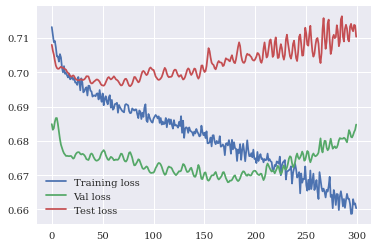

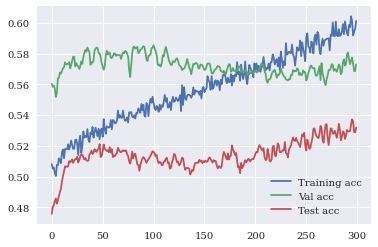

291 0.5294117647058824
최종 acc
0.5318627450980392


In [ ]:
# Train model
#####################
num_epochs = 300
hist1 = np.zeros(num_epochs)
hist0=  np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
hist3 = np.zeros(num_epochs)
hist4 = np.zeros(num_epochs)
hist5 = np.zeros(num_epochs)

hist6 = np.zeros(num_epochs)
hist7 = np.zeros(num_epochs)
hist8 = np.zeros(num_epochs)
seq=10
# Number of steps to unroll
seq_dim =seq-1  
beta=1
patience=300
check_early_stopping=0
val_accuracy=0
test_accuracy=0
# Build model
#####################

#the window size𝑤 in {10, 15}, the market context weight
# 𝛽 in {0.01, 0.1, 1}, the hidden layer size ℎ in {64, 128}, the number
# of epochs in {100, 200}, and the learning rate in {0.001, 0.0001}. We
# set the strength 𝜆 of selective regularization to 1 and the dropout
# rate to 0.15. We use the Adam optimizer [14] for the training with
# the early stopping by the validation accuracy. For competitors, we
# use the default settings in their public implementations.
input_dim = 11

num_layers = 1 
output_dim = 1
stocknumbers=85 #stocknumbers acl 85. kdd 50
n_heads=8

dropout=0.15

beta_dir=[1] #1
hidden_list=[64 ] #128
lr_list=[0.0001] #0.0001
checkepoch=0
result_dir={}

finishpoint=0
lastvalacc=0
count=0
for beta in beta_dir:
  for hidden in hidden_list:
    for learningrate in lr_list:
      hidden_dim=hidden
      pf_dim=hidden_dim * 4
      encoder=Encoder(
                 input_dim, 
                 hidden_dim, 
                 2, #encoder layer 개수 부분
                 n_heads, 
                 pf_dim,
                 dropout,
                 device, 
                 
                 max_length = 100)
      model = DTML(input_dim=input_dim, hidden_dim=hidden, output_dim=output_dim, num_layers=num_layers,encoder=encoder).to(device)

      loss_fn = torch.nn.BCEWithLogitsLoss()

      #optimiser = torch.optim.SGD(model.parameters(), lr=learningrate,momentum=0.9)
      optimiser = torch.optim.Adam(model.parameters(), lr=learningrate)
      print(beta,hidden,learningrate)



      for t in range(num_epochs):
        model.train()
        trainacc=0
        trainloss=0
        for batch_idx, batch in enumerate(train_dataloader):
          
          x,y,global_value,train_title=batch
          #print(train_title)  
          # Initialise hidden state
          # Don't do this if you want your LSTM to be stateful
          #model.hidden = model.init_hidden()
          
          # print(x)
          # print(len(x))
          # print(y)
          # print(global_value)
          # print(x.shape)
          # print(y.shape)
          # print(global_value.shape)
          # torch.Size([64, 85, 10, 11])
          # torch.Size([64, 85, 1])
          # torch.Size([64, 85, 10, 11])
          #print(x.shape)
          #print(y.shape)
          #print(global_value.shape)
          x=x.view([-1,10,11])
          y=y.view([-1,1])
          #print(train_title.shape)
          train_title=train_title.view([-1,1])
          global_value=global_value.view([-1,10,11])
          
          #y_train_pred = model(x)
          #print(len(x),len(x)//85)
          y_train_pred = model(x,len(x)//total_stocks,global_value,beta)
          # print(y_train_pred)
          # print(y_train_pred.shape)
          # print(y_train)
          # print(y_train.shape)
        
          loss = loss_fn(y_train_pred, y)
          trainloss=trainloss+loss
          trainacc=trainacc+get_accuracy(y,y_train_pred)
          l2_lambda = 1
          l2_norm=0
          # l2_norm = sum(p.pow(2.0).sum()
          #               for p in model.parameters())
          #print(loss)
          checkcount=0
          for idx, p in enumerate(model.parameters()):
            checkcount=idx
          #print(checkcount)
          for idx, p in enumerate(model.parameters()):
            if idx==checkcount-1:
              l2_norm = p.pow(2.0).sum()
              #print(l2_norm)
            elif idx==checkcount:
              #print(p.pow(2.0).sum())
              l2_norm=l2_norm + p.pow(2.0).sum()
              #print(l2_norm)
          loss = loss + l2_lambda * l2_norm
          
          #print(loss)
          #input()
          optimiser.zero_grad()

          # Backward pass
          loss.backward()

          # Update parameters
          optimiser.step()
          # print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
          #   t, num_epochs, batch_idx, len(train_dataloader),
          #   loss.item()
          #   ))
          # Forward pass
          # y_train_pred = model(x_train,len(x_train)//85,global_train,beta)
          # # print(y_train_pred)
          # # print(y_train_pred.shape)
          # # print(y_train)
          # # print(y_train.shape)
          # # print("traindata accuracy ",get_accuracy(y_train,y_train_pred))
          # loss = loss_fn(y_train_pred, y_train)
          # l2_lambda = 1
          # # l2_norm = sum(p.pow(2.0).sum()
          # #               for p in model.parameters())
          # checkcount=0
          # for idx, p in enumerate(model.parameters()):
          #   checkcount=idx
          # #print(checkcount)
          # for idx, p in enumerate(model.parameters()):
          #   if idx==checkcount-1:
          #     l2_norm = p.pow(2.0).sum()
          #   elif idx==checkcount:
          #     l2_norm=l2_norm + p.pow(2.0).sum()
          # loss = loss + l2_lambda * l2_norm
          #print(loss)
          
          # if t % 10 == 0 and t !=0:
          #     print("Epoch ", t, "CE: ", loss.item())
          hist0[t] = trainloss/len(train_dataloader)
          hist2[t]= trainacc/len(train_dataloader)
          # print("Epoch: ",t)
          # print("training acc: {}, training loss: {}".format(get_accuracy(y_train,y_train_pred),loss))
          
          # Zero out gradient, else they will accumulate between epochs
          #optimiser.zero_grad()

          # Backward pass
          #loss.backward()

          # Update parameters
          #optimiser.step()

        model.eval()

        correct=0
        valacc=0
        valloss=0
        with torch.no_grad():
          for batch_idx, batch in enumerate(val_dataloader):
            x_val,y_val,global_value_val,val_title=batch 
            x_val=x_val.view([-1,10,11])
            y_val=y_val.view([-1,1])
            val_title=val_title.view([-1,1])
            global_value_val=global_value_val.view([-1,10,11])
            y_val_pred = model(x_val,len(x_val)//total_stocks,global_value_val,beta)
            valacc=valacc+get_accuracy(y_val,y_val_pred)
            loss=loss_fn(y_val_pred, y_val)
            valloss=valloss+loss
            # l2_lambda = 1
            # l2_norm=0
            # # l2_norm = sum(p.pow(2.0).sum()
            # #               for p in model.parameters())
            # #print(loss)
            # checkcount=0
            
            # for idx, p in enumerate(model.parameters()):
            #   checkcount=idx
            # #print(checkcount)
            # for idx, p in enumerate(model.parameters()):
            #   if idx==checkcount-1:
            #     l2_norm = p.pow(2.0).sum()
            #     #print(l2_norm)
            #   elif idx==checkcount:
            #     #print(p.pow(2.0).sum())
            #     l2_norm=l2_norm + p.pow(2.0).sum()
            #     #print(l2_norm)
            # loss = loss + l2_lambda * l2_norm
            
          #   #val_acc=get_accuracy(y_val,y_val_pred)
          #   val_loss = loss_fn(y_val_pred, y_val)
          #  #hist1[t] = val_loss.item()
          #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
          #   test_acc=get_accuracy(y_test,y_test_pred)
          #   hist3[t]=val_acc
          #   hist4[t]=test_acc
          #   #print(y_val_pred)
          #   #print(get_accuracy(y_val,y_val_pred))
          #   if val_accuracy <val_acc:
          #     val_accuracy=val_acc
          #     test_accuracy=test_acc
          #     check_early_stopping=0
          #     checkepoch=t
          #   else:
          #     check_early_stopping=check_early_stopping+1
          hist1[t] = valloss/len(val_dataloader)
          hist3[t]=valacc/len(val_dataloader)
          testacc=0
          testloss=0
          testacctop1=0
          testacctop3=0
          testacctop5=0
          for batch_idx, batch in enumerate(test_dataloader):
            x_test,y_test,global_value_test,test_title=batch 
            x_test=x_test.view([-1,10,11])
            y_test=y_test.view([-1,1])
            test_title=test_title.view([-1,1])
            global_value_test=global_value_test.view([-1,10,11])

            y_test_pred = model(x_test,len(x_test)//total_stocks,global_value_test,beta)
            testacc=testacc+get_accuracy(y_test,y_test_pred)
            #testacctop1=testacctop1+get_top_k_accuracy(y_test,y_test_pred,1)
            #testacctop3=testacctop3+get_top_k_accuracy(y_test,y_test_pred,3)
            #testacctop5=testacctop5+get_top_k_accuracy(y_test,y_test_pred,5)
            loss=loss_fn(y_test_pred, y_test)
            testloss=testloss+loss
            # l2_lambda = 1
            # l2_norm=0
            # # l2_norm = sum(p.pow(2.0).sum()
            # #               for p in model.parameters())
            # #print(loss)
            # checkcount=0
            
            # for idx, p in enumerate(model.parameters()):
            #   checkcount=idx
            # #print(checkcount)
            # for idx, p in enumerate(model.parameters()):
            #   if idx==checkcount-1:
            #     l2_norm = p.pow(2.0).sum()
            #     #print(l2_norm)
            #   elif idx==checkcount:
            #     #print(p.pow(2.0).sum())
            #     l2_norm=l2_norm + p.pow(2.0).sum()
            #     #print(l2_norm)
            # loss = loss + l2_lambda * l2_norm
            
            
          #   #val_acc=get_accuracy(y_val,y_val_pred)
          #   val_loss = loss_fn(y_val_pred, y_val)
          #  #hist1[t] = val_loss.item()
          #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
          #   test_acc=get_accuracy(y_test,y_test_pred)
          #   hist3[t]=val_acc
          #   hist4[t]=test_acc
          #   #print(y_val_pred)
          #   #print(get_accuracy(y_val,y_val_pred))
          #   if val_accuracy <val_acc:
          #     val_accuracy=val_acc
          #     test_accuracy=test_acc
          #     check_early_stopping=0
          #     checkepoch=t
          #   else:
          #     check_early_stopping=check_early_stopping+1
          #hist1[t] = val_loss.item()
          hist4[t]=testacc/len(test_dataloader)
          hist5[t]=testloss/len(test_dataloader)

          #hist6[t]=testacctop1/len(test_dataloader)
          #hist7[t]=testacctop3/len(test_dataloader)
          #hist8[t]=testacctop5/len(test_dataloader)
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f} test{} val{}'.format(
            t, num_epochs, batch_idx, len(train_dataloader),
            loss.item(),hist4[t],hist3[t]
            ))
        if lastvalacc<hist3[t] and t>250:
          if finishpoint==0:
            count=0

            lastvalacc=hist3[t]
            torch.save(model, 'model_dtml.pt')
            print(t,hist4[t])
            myepoch=t
            mytestacc=hist4[t]  
        elif t>250 and lastvalacc>=hist3[t]:
          count=count+1
          if count==100:
            print(myepoch,mytestacc)
            finishpoint=1
        # print("val acc: {}, test acc: {}".format(val_acc,test_acc))
        # if check_early_stopping==patience:
        #   print("early stopping!")
        #   print(val_accuracy)
        #   print("epochs: ",t)
            
      #test score
      # model.eval()
      # with torch.no_grad():
      #     y_test_pred=model(x_test)
      #     print(get_accuracy(y_test,y_test_pred))
      print("Best test acc: ",test_accuracy)


      plt.plot(hist0, label="Training loss")
      plt.plot(hist1, label="Val loss")
      plt.plot(hist5, label="Test loss")
      plt.legend()
      plt.show()
      plt.plot(hist2, label="Training acc")
      plt.plot(hist3, label="Val acc")
      plt.plot(hist4, label="Test acc")
      plt.legend()
      plt.show()

      #plt.plot(hist6, label="Top1 acc")
      #plt.plot(hist7, label="Top3 acc")
      #plt.plot(hist8, label="Top5 acc")
      #plt.legend()
      #plt.show()

      print(myepoch,mytestacc)
      #result_dir["beta_{}_hidden_{}_lr_{}_val_acc{}_epoch_{}_last_test_acc{}".format(beta,hidden,learningrate,val_accuracy,checkepoch,test_acc)]=test_accuracy
      torch.cuda.empty_cache()

print("최종 acc")
print(testacc/len(test_dataloader))

In [ ]:
##진짜진짜
class Encoder(nn.Module):
    def __init__(self, 
                 input_dim, 
                 hid_dim, 
                 n_layers, 
                 n_heads, 
                 pf_dim,
                 dropout, 
                 device,
                 max_length = 100):
        super().__init__()

        
        
        
        
        self.layers = nn.ModuleList([EncoderLayer(hid_dim, 
                                                  n_heads, 
                                                  pf_dim,
                                                  dropout,device 
                                                  ) 
                                     for _ in range(n_layers)])
        
        self.dropout = nn.Dropout(dropout)
        
        
        
    def forward(self, src):
        
        #src = [batch size, src len]
        #src_mask = [batch size, 1, 1, src len]
        
        batch_size = src.shape[0]
        src_len = src.shape[1]
        
        
        
        for layer in self.layers:
            src = layer(src)
            
        #src = [batch size, src len, hid dim]
            
        return src

class EncoderLayer(nn.Module):
    def __init__(self, 
                 hid_dim, 
                 n_heads, 
                 pf_dim,  
                 dropout,device 
                 ):
        super().__init__()
        
        self.layer_norm1 = nn.LayerNorm(hid_dim)
        self.layer_norm2 = nn.LayerNorm(hid_dim)
        
        self.self_attention = MultiHeadAttentionLayer(hid_dim, n_heads, dropout,device)
        self.positionwise_feedforward = PositionwiseFeedforwardLayer(hid_dim, 
                                                                     pf_dim, 
                                                                     dropout)
        self.dropout = nn.Dropout(dropout)
        self.MLP1=nn.Linear(hid_dim,pf_dim)
        self.MLP2=nn.Linear(pf_dim,hid_dim)
        self.tanh_layer=nn.Tanh()
    def forward(self, src):
        
        #src = [batch size, src len, hid dim]
        #src_mask = [batch size, 1, 1, src len] 
                
        #self attention
        _src, _ = self.self_attention(src, src, src) #_src H물결  src H
        add_norm=self.layer_norm1(_src+src)
        #dropout, residual connection and layer norm
        t=self.MLP1(add_norm)
        t = torch.nn.functional.relu(t)
        t=self.dropout(t)
        t=self.MLP2(t)
        t=torch.nn.functional.relu(t)
        t=self.dropout(t)
        
        
        #src = [batch size, src len, hid dim]
        
        #positionwise feedforward
        src = self.tanh_layer(t+add_norm) #
        src=self.dropout(src)
        #dropout, residual and layer norm
        src = self.layer_norm2(src)
        
        #src = [batch size, src len, hid dim]
        
        return src

class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hid_dim, n_heads, dropout,device):
        super().__init__()
        
        assert hid_dim % n_heads == 0
        
        self.hid_dim = hid_dim
        self.n_heads = n_heads
        self.head_dim = hid_dim // n_heads
        
        self.fc_q = nn.Linear(hid_dim, hid_dim)
        self.fc_k = nn.Linear(hid_dim, hid_dim)
        self.fc_v = nn.Linear(hid_dim, hid_dim)
        
        self.fc_o = nn.Linear(hid_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        #self.scale = torch.sqrt(torch.FloatTensor([self.head_dim])).to(device)
        
    def forward(self, query, key, value, mask = None):
        
        batch_size = query.shape[0]
        
        #query = [batch size, query len, hid dim]
        #key = [batch size, key len, hid dim]
        #value = [batch size, value len, hid dim]
                
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)
        
        #Q = [batch size, query len, hid dim]
        #K = [batch size, key len, hid dim]
        #V = [batch size, value len, hid dim]
                
        Q = Q.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.n_heads, self.head_dim).permute(0, 2, 1, 3)
        
        #Q = [batch size, n heads, query len, head dim]
        #K = [batch size, n heads, key len, head dim]
        #V = [batch size, n heads, value len, head dim]
                
        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale
        
        #energy = [batch size, n heads, query len, key len]
        
        if mask is not None:
            energy = energy.masked_fill(mask == 0, -1e10)
        
        attention = torch.softmax(energy, dim = -1)
                
        #attention = [batch size, n heads, query len, key len]
                
        x = torch.matmul(self.dropout(attention), V)
        
        #x = [batch size, n heads, query len, head dim]
        
        x = x.permute(0, 2, 1, 3).contiguous()
        
        #x = [batch size, query len, n heads, head dim]
        
        x = x.view(batch_size, -1, self.hid_dim)
        
        #x = [batch size, query len, hid dim]
        
        x = self.fc_o(x)
        
        #x = [batch size, query len, hid dim]
        
        return x, attention

class PositionwiseFeedforwardLayer(nn.Module):
    def __init__(self, hid_dim, pf_dim, dropout):
        super().__init__()
        
        self.fc_1 = nn.Linear(hid_dim, pf_dim)
        self.fc_2 = nn.Linear(pf_dim, hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        
        #x = [batch size, seq len, hid dim]
        
        new_x = self.dropout(torch.relu(self.fc_1(x)))
        
        #x = [batch size, seq len, pf dim]
        
        new_x = self.fc_2(new_x)
        
        #x = [batch size, seq len, hid dim]
        
        return x

# Build model
#####################

#the window size𝑤 in {10, 15}, the market context weight
# 𝛽 in {0.01, 0.1, 1}, the hidden layer size ℎ in {64, 128}, the number
# of epochs in {100, 200}, and the learning rate in {0.001, 0.0001}. We
# set the strength 𝜆 of selective regularization to 1 and the dropout
# rate to 0.15. We use the Adam optimizer [14] for the training with
# the early stopping by the validation accuracy. For competitors, we
# use the default settings in their public implementations.






# Here we define our model as a class
class MDTML(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,encoder):
        super(MDTML, self).__init__()
        self.softmax_layer=nn.Softmax(dim=1)
        #feature transformerlayer
        self.feature_transformer=nn.Linear(input_dim,hidden_dim)
        self.tanh_layer=nn.Tanh()
        #self.global_train=global_train
        self.title_transformer=nn.Linear(1,hidden_dim)
        self.global_feature_transformer=nn.Linear(input_dim,hidden_dim)
        self.global_tanh_layer=nn.Tanh()

        self.layer_nomalization= nn.LayerNorm(hidden_dim)
        self.layer_nomalization2= nn.LayerNorm(hidden_dim)
        self.layer_nomalization3= nn.LayerNorm(hidden_dim)


        self.layer_norm=nn.LayerNorm(hidden_dim)
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.stocklstm = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)
        self.globallstm = nn.LSTM(hidden_dim, hidden_dim, num_layers, batch_first=True)


        #transformer
        self.encoder=encoder
        # Readout layer
        self.fc1 = nn.Linear(hidden_dim, output_dim)
        # self.fc2 = nn.Linear(hidden_dim//4, hidden_dim//16)
        
        # self.fc3 = nn.Linear(hidden_dim//16, output_dim)

    def forward(self, x,numbers,global_train,beta,title):
        #print(numbers)
        #input()
        # Initialize hidden state with zeros
        #print(x)
        #print(x.shape)
        title= title.type(torch.FloatTensor).to(device)
        
        x=self.feature_transformer(x)
        x=self.tanh_layer(x)

        # global_train=self.global_feature_transformer(global_train)
        # global_train=self.global_tanh_layer(global_train)

        ###최근에 바꾼거   
        global_train=self.feature_transformer(global_train)
        ###최근에 바꾼거   
        global_train=self.tanh_layer(global_train)

        
        #print(x)
        #print(x.shape) #torch.Size([98750, 10, 11])
        #input()
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_().to(device)

        #input()
        global_h0 = torch.zeros(self.num_layers, global_train.size(0), self.hidden_dim).requires_grad_().to(device)
        global_c0 = torch.zeros(self.num_layers, global_train.size(0), self.hidden_dim).requires_grad_().to(device)
        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        #print(x)
        #print(x.shape)
        out, (hn, cn) = self.stocklstm(x, (h0.detach(), c0.detach()))
        #out = self.layer_nomalization2(out)
        global_out, (global_hn,global_cn) = self.globallstm(global_train,(global_h0.detach(), global_c0.detach()))
        #global_out = self.layer_nomalization3(global_out)
        #global_out, (global_hn,global_cn) = self.stocklstm(global_train,(global_h0.detach(), global_c0.detach()))
        #print(global_out.shape) #torch.Size([1975, 10, 32])
        #print(out[0],global_out[0])
        #global market attention
        global_base=global_out[:,-1,:].view(-1,1,self.hidden_dim)
        global_base=global_base.transpose(1,2)
        global_score=torch.bmm(global_out,global_base)
        global_score = self.softmax_layer(global_score) #softmax score까지함
        #print(global_score[0].sum())
        global_transpose_out=global_out[:,:,:].transpose(1,2) #torch.Size([98750, 32, 10])
        global_new_out=torch.bmm(global_transpose_out,global_score)
        global_new_out=global_new_out.view(-1,self.hidden_dim)
        #print(global_new_out)
        #print(global_new_out.shape) #torch.Size([1975, 32])
        #print(len(global_new_out))
        


        sumscore=0
        scorelist=[]
        #print(out[:,-1,:].shape)#torch.Size([98750, 32])
        #print(out[:,:,:].shape) #torch.Size([98750, 10, 32])
        

        #stock attention
        base=out[:,-1,:].view(-1,1,self.hidden_dim)
        base=base.transpose(1,2)
        score=torch.bmm(out,base)
        score = self.softmax_layer(score) #softmax score까지함
        transpose_out=out[:,:,:].transpose(1,2) #torch.Size([98750, 32, 10])
        new_out=torch.bmm(transpose_out,score)
        new_out=new_out.view(-1,self.hidden_dim)

        #print(new_out)
        #print(new_out.shape) #torch.Size([98750, 32]) #시간대별로 노멀라이즈 9875/ 50 = 1975일  98750
        #input()
        ###최근에 바꾼거   
        
        ###최근에 바꾼거 
        myindex=0
        #print(len(global_new_out)) 5440
        
        
        #print(len(new_out)) 5440
        for i in range(len(global_new_out)):  #ACL 85, KDD 50
          
            
            
          new_out[i]=new_out[i]+global_new_out[i]*beta
          
          
        #print(new_out.shape) #torch.Size([98750, 32]) H: 50,32  W size:32x32  H를 layer 3개에 넣어서 Q,K,V를 만듦 50x32 
        #만들어야할것 98750,50,32 형태
        #print(new_out[0].shape)
        # temp1=new_out[0]
        # temp2=new_out[1]
        # #print(temp1,temp2)
        # temp3=torch.stack([temp1,temp2],0)
        #print(temp3)
        #print(temp3.shape)  #1975,50,32를 만들고 싶음
        new_out=self.layer_nomalization(new_out)
        new_data_list=[]
        #print(len(global_new_out))
        #print(new_out.shape) #5440 64
        #input()
        for i in range(numbers):
          temp=[]
          for j in range(total_stocks): #ACL 85, KDD 50 398 33830
            temp.append(new_out[j+total_stocks*i])
          ttt=torch.stack(temp,0)  #1,50,32
          #rint(ttt.size())
          new_data_list.append(ttt)
          #Q K 내적 50x32 32x50 -> 50x50 attention map 만들고 attention map softmax 취한 후 value와 곱하면 50x32 query attention이 됨 이걸 사용해서 prediction하면됨
        #print(len(new_data_list))
        #input()
        transformerdatalist=torch.stack(new_data_list,0)  #1,50,32
        #print(transformerdatalist.shape) #64 85 64
        #input()
        #print(transformerdatalist[0][0])
        #print(transformerdatalist[0][1])
        my_output=encoder(transformerdatalist)
        #print(my_output)
        #print(my_output.shape) #1975,50,32   64 85 64
        #input()
        #print(my_output[0][0])
        #print(my_output[0][1])
        #print(len(my_output))
        #print(numbers)
        #input()
        #result_list=[]
        #for i in range(85):
        #  for j in range(numbers):
        #    result_list.append(my_output[j][i])
        
        #print(len(result_list))
        
        #print(result_list[64])
        #input()
        #new_new_out=torch.stack(my_output,0)

        my_output=my_output.view([-1,64])
        my_title=self.title_transformer(title)
        my_output=my_output+my_title
        
        #print(my_title.shape)
        # output1 = torch.cat([my_output,my_title], dim=1) #[M, N+N, K]  
        #print(output1.shape) 
        #print(new_new_out.shape)
        #input()
        out = self.fc1(my_output)
        #out = self.fc2(out)
        #out = self.fc3(out)
        

        
        #input() 
        # out.size() --> 100, 10
        return out
    




1 64 0.0001
Epoch    0/300 Batch 0/2 tra0.4909667430876845 test0.5227272727272727 val0.5167906242956953 tra0.7526003122329712 test0.7131909728050232 val0.7019139528274536
Epoch    1/300 Batch 0/2 tra0.4920521711142322 test0.5207219251336899 val0.5233265720081136 tra0.7331092357635498 test0.7018145322799683 val0.7007666826248169
Epoch    2/300 Batch 0/2 tra0.49567098170026436 test0.5104723707664884 val0.5377507324768988 tra0.7238094806671143 test0.6963377594947815 val0.7047429084777832
Epoch    3/300 Batch 0/2 tra0.5006635203238599 test0.5120320855614974 val0.5587108406581023 tra0.7198280096054077 test0.6939471364021301 val0.7096407413482666
Epoch    4/300 Batch 0/2 tra0.5037590879048248 test0.5098039215686274 val0.5738111336488618 tra0.7189803123474121 test0.6918467283248901 val0.7133196592330933
Epoch    5/300 Batch 0/2 tra0.5070317233283763 test0.5082442067736186 val0.5758395312147848 tra0.7161283493041992 test0.6896180510520935 val0.7149266600608826
Epoch    6/300 Batch 0/2 tra0.509

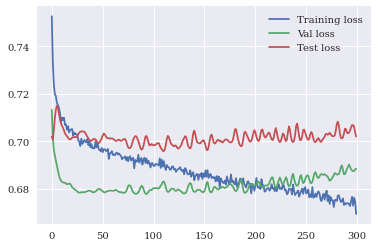

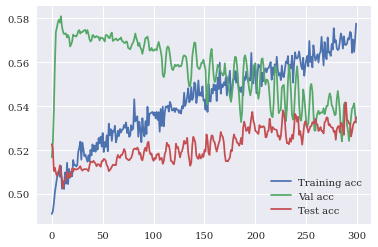

255 0.5309714795008913
최종 acc
0.5349821746880571


In [ ]:
# Train model
#####################
num_epochs = 300
hist1 = np.zeros(num_epochs)
hist0=  np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
hist3 = np.zeros(num_epochs)
hist4 = np.zeros(num_epochs)
hist5 = np.zeros(num_epochs)

hist6 = np.zeros(num_epochs)
hist7 = np.zeros(num_epochs)
hist8 = np.zeros(num_epochs)
seq=10
# Number of steps to unroll
seq_dim =seq-1  
beta=1
patience=300
check_early_stopping=0
val_accuracy=0
test_accuracy=0
# Build model
#####################

#the window size𝑤 in {10, 15}, the market context weight
# 𝛽 in {0.01, 0.1, 1}, the hidden layer size ℎ in {64, 128}, the number
# of epochs in {100, 200}, and the learning rate in {0.001, 0.0001}. We
# set the strength 𝜆 of selective regularization to 1 and the dropout
# rate to 0.15. We use the Adam optimizer [14] for the training with
# the early stopping by the validation accuracy. For competitors, we
# use the default settings in their public implementations.
input_dim = 11

num_layers = 1 
output_dim = 1
stocknumbers=85 #stocknumbers acl 85. kdd 50
n_heads=8

dropout=0.15

beta_dir=[1] #1
hidden_list=[64 ] #128
lr_list=[0.0001] #0.0001
checkepoch=0
result_dir={}

finishpoint=0
lastvalacc=0
count=0
for beta in beta_dir:
  for hidden in hidden_list:
    for learningrate in lr_list:
      hidden_dim=hidden
      pf_dim=hidden_dim * 4
      encoder=Encoder(
                 input_dim, 
                 hidden_dim, 
                 2, #encoder layer 개수 부분
                 n_heads, 
                 pf_dim,
                 dropout,
                 device, 
                 
                 max_length = 100)
      model = MDTML(input_dim=input_dim, hidden_dim=hidden, output_dim=output_dim, num_layers=num_layers,encoder=encoder).to(device)

      loss_fn = torch.nn.BCEWithLogitsLoss()

      #optimiser = torch.optim.SGD(model.parameters(), lr=learningrate,momentum=0.9)
      optimiser = torch.optim.Adam(model.parameters(), lr=learningrate)
      print(beta,hidden,learningrate)



      for t in range(num_epochs):
        model.train()
        trainacc=0
        trainloss=0
        for batch_idx, batch in enumerate(train_dataloader):
          
          x,y,global_value,train_title=batch
          #print(train_title)  
          # Initialise hidden state
          # Don't do this if you want your LSTM to be stateful
          #model.hidden = model.init_hidden()
          
          # print(x)
          # print(len(x))
          # print(y)
          # print(global_value)
          # print(x.shape)
          # print(y.shape)
          # print(global_value.shape)
          # torch.Size([64, 85, 10, 11])
          # torch.Size([64, 85, 1])
          # torch.Size([64, 85, 10, 11])
          x=x.view([-1,10,11])
          y=y.view([-1,1])
          train_title=train_title.view([-1,1])
          global_value=global_value.view([-1,10,11])
          
          #y_train_pred = model(x)
          #print(len(x),len(x)//85)
          y_train_pred = model(x,len(x)//total_stocks,global_value,beta,train_title)
          # print(y_train_pred)
          # print(y_train_pred.shape)
          # print(y_train)
          # print(y_train.shape)
        
          loss = loss_fn(y_train_pred, y)
          trainloss=trainloss+loss
          trainacc=trainacc+get_accuracy(y,y_train_pred)
          l2_lambda = 1
          l2_norm=0
          # l2_norm = sum(p.pow(2.0).sum()
          #               for p in model.parameters())
          #print(loss)
          checkcount=0
          for idx, p in enumerate(model.parameters()):
            checkcount=idx
          #print(checkcount)
          for idx, p in enumerate(model.parameters()):
            if idx==checkcount-1:
              l2_norm = p.pow(2.0).sum()
              #print(l2_norm)
            elif idx==checkcount:
              #print(p.pow(2.0).sum())
              l2_norm=l2_norm + p.pow(2.0).sum()
              #print(l2_norm)
          loss = loss + l2_lambda * l2_norm
          
          #print(loss)
          #input()
          optimiser.zero_grad()

          # Backward pass
          loss.backward()

          # Update parameters
          optimiser.step()
          
          # Forward pass
          # y_train_pred = model(x_train,len(x_train)//85,global_train,beta)
          # # print(y_train_pred)
          # # print(y_train_pred.shape)
          # # print(y_train)
          # # print(y_train.shape)
          # # print("traindata accuracy ",get_accuracy(y_train,y_train_pred))
          # loss = loss_fn(y_train_pred, y_train)
          # l2_lambda = 1
          # # l2_norm = sum(p.pow(2.0).sum()
          # #               for p in model.parameters())
          # checkcount=0
          # for idx, p in enumerate(model.parameters()):
          #   checkcount=idx
          # #print(checkcount)
          # for idx, p in enumerate(model.parameters()):
          #   if idx==checkcount-1:
          #     l2_norm = p.pow(2.0).sum()
          #   elif idx==checkcount:
          #     l2_norm=l2_norm + p.pow(2.0).sum()
          # loss = loss + l2_lambda * l2_norm
          #print(loss)
          
          # if t % 10 == 0 and t !=0:
          #     print("Epoch ", t, "CE: ", loss.item())
          hist0[t] = trainloss/len(train_dataloader)
          hist2[t]= trainacc/len(train_dataloader)
          # print("Epoch: ",t)
          # print("training acc: {}, training loss: {}".format(get_accuracy(y_train,y_train_pred),loss))
          
          # Zero out gradient, else they will accumulate between epochs
          #optimiser.zero_grad()

          # Backward pass
          #loss.backward()

          # Update parameters
          #optimiser.step()

        model.eval()

        correct=0
        valacc=0
        valloss=0
        with torch.no_grad():
          for batch_idx, batch in enumerate(val_dataloader):
            x_val,y_val,global_value_val,val_title=batch 
            x_val=x_val.view([-1,10,11])
            y_val=y_val.view([-1,1])
            val_title=val_title.view([-1,1])
            global_value_val=global_value_val.view([-1,10,11])
            y_val_pred = model(x_val,len(x_val)//total_stocks,global_value_val,beta,val_title.cuda())
            valacc=valacc+get_accuracy(y_val,y_val_pred)
            loss=loss_fn(y_val_pred, y_val)
            valloss=valloss+loss
            # l2_lambda = 1
            # l2_norm=0
            # # l2_norm = sum(p.pow(2.0).sum()
            # #               for p in model.parameters())
            # #print(loss)
            # checkcount=0
            
            # for idx, p in enumerate(model.parameters()):
            #   checkcount=idx
            # #print(checkcount)
            # for idx, p in enumerate(model.parameters()):
            #   if idx==checkcount-1:
            #     l2_norm = p.pow(2.0).sum()
            #     #print(l2_norm)
            #   elif idx==checkcount:
            #     #print(p.pow(2.0).sum())
            #     l2_norm=l2_norm + p.pow(2.0).sum()
            #     #print(l2_norm)
            # loss = loss + l2_lambda * l2_norm
            
          #   #val_acc=get_accuracy(y_val,y_val_pred)
          #   val_loss = loss_fn(y_val_pred, y_val)
          #  #hist1[t] = val_loss.item()
          #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
          #   test_acc=get_accuracy(y_test,y_test_pred)
          #   hist3[t]=val_acc
          #   hist4[t]=test_acc
          #   #print(y_val_pred)
          #   #print(get_accuracy(y_val,y_val_pred))
          #   if val_accuracy <val_acc:
          #     val_accuracy=val_acc
          #     test_accuracy=test_acc
          #     check_early_stopping=0
          #     checkepoch=t
          #   else:
          #     check_early_stopping=check_early_stopping+1
          hist1[t] = valloss/len(val_dataloader)
          hist3[t]=valacc/len(val_dataloader)
          testacc=0
          testloss=0
          testacctop1=0
          testacctop3=0
          testacctop5=0
          for batch_idx, batch in enumerate(test_dataloader):
            x_test,y_test,global_value_test,test_title=batch 
            x_test=x_test.view([-1,10,11])
            y_test=y_test.view([-1,1])
            test_title=test_title.view([-1,1])
            global_value_test=global_value_test.view([-1,10,11])

            y_test_pred = model(x_test,len(x_test)//total_stocks,global_value_test,beta,test_title.cuda())
            testacc=testacc+get_accuracy(y_test,y_test_pred)
            # testacctop1=testacctop1+get_top_k_accuracy(y_test,y_test_pred,1)
            # testacctop3=testacctop3+get_top_k_accuracy(y_test,y_test_pred,3)
            # testacctop5=testacctop5+get_top_k_accuracy(y_test,y_test_pred,5)
            loss=loss_fn(y_test_pred, y_test)
            testloss=testloss+loss
            # l2_lambda = 1
            # l2_norm=0
            # # l2_norm = sum(p.pow(2.0).sum()
            # #               for p in model.parameters())
            # #print(loss)
            # checkcount=0
            
            # for idx, p in enumerate(model.parameters()):
            #   checkcount=idx
            # #print(checkcount)
            # for idx, p in enumerate(model.parameters()):
            #   if idx==checkcount-1:
            #     l2_norm = p.pow(2.0).sum()
            #     #print(l2_norm)
            #   elif idx==checkcount:
            #     #print(p.pow(2.0).sum())
            #     l2_norm=l2_norm + p.pow(2.0).sum()
            #     #print(l2_norm)
            # loss = loss + l2_lambda * l2_norm
            
            
          #   #val_acc=get_accuracy(y_val,y_val_pred)
          #   val_loss = loss_fn(y_val_pred, y_val)
          #  #hist1[t] = val_loss.item()
          #   y_test_pred=model(x_test,len(x_test)//85,global_test,beta)
          #   test_acc=get_accuracy(y_test,y_test_pred)
          #   hist3[t]=val_acc
          #   hist4[t]=test_acc
          #   #print(y_val_pred)
          #   #print(get_accuracy(y_val,y_val_pred))
          #   if val_accuracy <val_acc:
          #     val_accuracy=val_acc
          #     test_accuracy=test_acc
          #     check_early_stopping=0
          #     checkepoch=t
          #   else:
          #     check_early_stopping=check_early_stopping+1
          #hist1[t] = val_loss.item()
          hist4[t]=testacc/len(test_dataloader)
          hist5[t]=testloss/len(test_dataloader)

          # hist6[t]=testacctop1/len(test_dataloader)
          # hist7[t]=testacctop3/len(test_dataloader)
          # hist8[t]=testacctop5/len(test_dataloader)
        print('Epoch {:4d}/{} Batch {}/{} tra{} test{} val{} tra{} test{} val{}'.format(
            t, num_epochs, batch_idx, len(train_dataloader),
            hist2[t],hist4[t],hist3[t],hist0[t],hist1[t],hist5[t]
            ))
        if lastvalacc<hist3[t] and t>250:
          if finishpoint==0:
            count=0

            lastvalacc=hist3[t]
            torch.save(model, 'model_dtml_korea11.pt')
            print(t,hist4[t])
            myepoch=t
            mytestacc=hist4[t]  
        elif t>250 and lastvalacc>=hist3[t]:
          count=count+1
          if count==100:
            print(myepoch,mytestacc)
            finishpoint=1
        # print("val acc: {}, test acc: {}".format(val_acc,test_acc))
        # if check_early_stopping==patience:
        #   print("early stopping!")
        #   print(val_accuracy)
        #   print("epochs: ",t)
            
      #test score
      # model.eval()
      # with torch.no_grad():
      #     y_test_pred=model(x_test)
      #     print(get_accuracy(y_test,y_test_pred))
      print("Best test acc: ",test_accuracy)


      plt.plot(hist0, label="Training loss")
      plt.plot(hist1, label="Val loss")
      plt.plot(hist5, label="Test loss")
      plt.legend()
      plt.show()
      plt.plot(hist2, label="Training acc")
      plt.plot(hist3, label="Val acc")
      plt.plot(hist4, label="Test acc")
      plt.legend()
      plt.show()

      # plt.plot(hist6, label="Top1 acc")
      # plt.plot(hist7, label="Top3 acc")
      # plt.plot(hist8, label="Top5 acc")
      # plt.legend()
      # plt.show()

      print(myepoch,mytestacc)
      print("최종 acc")
      print(testacc/len(test_dataloader))
      #result_dir["beta_{}_hidden_{}_lr_{}_val_acc{}_epoch_{}_last_test_acc{}".format(beta,hidden,learningrate,val_accuracy,checkepoch,test_acc)]=test_accuracy
      torch.cuda.empty_cache()